
Aim: Implement SVM Classifier or Regression for given dataset

In [17]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:

#  Load Dataset
penguins = sns.load_dataset('penguins')

#  Drop rows with missing values
penguins.dropna(inplace=True)

In [19]:

#  Feature and Target Selection
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']  # Target: 'Adelie', 'Chinstrap', 'Gentoo'


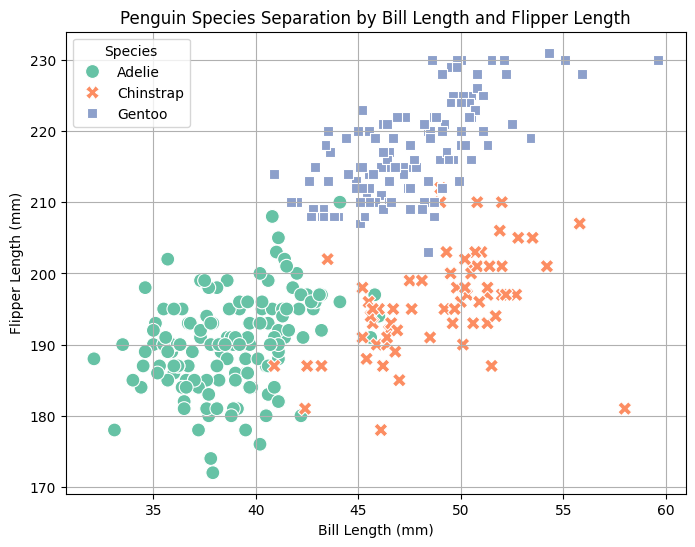

In [20]:
# Scatter plot of two features with species hue
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=penguins,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    style='species',
    palette='Set2',
    s=100
)
plt.title('Penguin Species Separation by Bill Length and Flipper Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()

In [21]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:

# Train Linear SVM
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train_scaled, y_train)

LinearSVC(max_iter=10000)

In [24]:

# Evaluate the Model
y_pred = svm_model.predict(X_test_scaled)
train_pred = svm_model.predict(X_train_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_pred))
print("\nConfusion Matrix (Train):\n", confusion_matrix(y_train, train_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 1.0

Confusion Matrix (Test):
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]

Confusion Matrix (Train):
 [[115   0   0]
 [  1  54   0]
 [  0   0  96]]

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

